In [8]:
# Netcdf 파일 불러오기를 위한 라이브러리 호출

from netCDF4 import Dataset
from netCDF4 import num2date
from datetime import datetime

import os
import datetime as dt
import time

# To handle the dataframe
import numpy as np
import pandas as pd

# To plot
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Machine learning library and API
import sklearn as sk
import warnings


##  파일 경로 설정 및 불러오기

In [9]:
# 파일 경로 설정

# path = "./Barents_72_5N_43_5W/NC_File/"
path = "./"
file_list = os.listdir(path)

print("file_list: {}".format(file_list))

file_list: ['ham.nc', '05_01_ecmwf_era5.ipynb', 'ECMWF_NC_DATA_Convert.ipynb', 'new.nc', '2020a.nc', 'tak_test.nc', '.ipynb_checkpoints']


In [10]:
# file_path_ecmwf = path+file_list[1]

In [14]:
file_path_ecmwf = path+file_list[3]

In [15]:
file_path_ecmwf

'./new.nc'

In [16]:
# Dataset : 파일 로드
ecmwf = Dataset(file_path_ecmwf)

In [17]:
print(ecmwf.variables.keys())

dict_keys(['time', 'lon', 'lat', 'lon_2', 'lat_2', 'u10n', '10u', 'v10n', '10v', 'mdww', 'mpww', 'mwd', 'mwp', 'pp1d', 'swh'])


## 변수 지정

In [19]:
# Time and location 
date = ecmwf.variables['time'][:]  # Hourly data
lon = ecmwf.variables['lon'][:]   # 파랑 데이터 말고 나머지 데이터의 위/경도 0.25deg x 0.25deg (s)
lat = ecmwf.variables['lat'][:]   # 파랑 데이터 말고 나머지 데이터의 위/경도

lon2 = ecmwf.variables['lon_2'][:] # 파랑 데이터의 위/경도  0.5deg x 0.5deg (ocean waves)
lat2 = ecmwf.variables['lat_2'][:] # 파랑 데이터의 위/경도

# Wind parameters
wu = ecmwf.variables['10u'][:]  # wind speed(u) 10m above sea surface (moving towards the east)
wv = ecmwf.variables['10v'][:]  # wind speed(v) 10m above sea surface (moving towards the east)

# Wave parameters
pwp = ecmwf.variables['pp1d'][:]  # peak wave period
swh = ecmwf.variables['swh'][:]   # significant wave height by wind + swell
# shww = ecmwf.variables['shww'][:] # significant wave height by wind
mwd = ecmwf.variables['mwd'][:]  # mean wave direction

# warnings.deprecationwarning("ignore")

In [20]:
swh.shape

(8784, 3, 3)

In [21]:
swh[2500,1,1]

4.9472284

In [23]:
swh.shape

(8784, 3, 3)

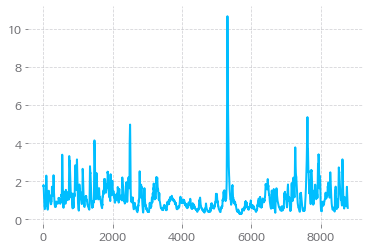

In [22]:
plt.plot(swh[:,1,1])

In [11]:
# np.save('lon',lon.data)
# np.save('lat',lat.data)
# np.save('lon2',lon2.data)
# np.save('lat2',lat2.data)

In [24]:
time = ecmwf.variables['time']
time_greg = num2date(time[:].data, time.units)
time_greg.shape

(8784,)

In [13]:
# 전체 dataset에 대해 불러오기 

for fn_temp in file_list[1:42]:   # 1:42 : 1980 - 2020
    file_path_ecmwf = path + fn_temp
#     print(file_path_ecmwf)
    ecmwf = Dataset(file_path_ecmwf)
#     print (swh.shape)
    
    # wind parameters
    wu  = np.append(wu, ecmwf.variables['10u'][:], axis=0)
    wv  = np.append(wv, ecmwf.variables['10v'][:], axis=0)
    
    # wave parameters
    swh  = np.append(swh, ecmwf.variables['swh'][:], axis=0)
    mwd  = np.append(mwd, ecmwf.variables['mwd'][:], axis=0)
    pwp = np.append(pwp, ecmwf.variables['pp1d'][:], axis=0)
    shww = np.append(shww, ecmwf.variables['shww'][:], axis=0)
    

    time_temp = ecmwf.variables['time']
    time_greg = np.append(time_greg, num2date(time_temp[:].data, time_temp.units),axis=0)


    

C:\Users\USER\AppData\Local\Temp/ipykernel_29240/3356683023.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wu  = np.append(wu, ecmwf.variables['10u'][:], axis=0)
C:\Users\USER\AppData\Local\Temp/ipykernel_29240/3356683023.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wv  = np.append(wv, ecmwf.variables['10v'][:], axis=0)
C:\Users\USER\

In [14]:
time_greg.shape

(336936,)

In [15]:
print(time_greg)

[cftime.DatetimeGregorian(1979, 1, 1, 0, 0, 0, 0)
 cftime.DatetimeGregorian(1979, 1, 1, 1, 0, 0, 0)
 cftime.DatetimeGregorian(1979, 1, 1, 2, 0, 0, 0) ...
 cftime.DatetimeGregorian(2020, 11, 30, 21, 0, 0, 0)
 cftime.DatetimeGregorian(2020, 11, 30, 22, 0, 0, 0)
 cftime.DatetimeGregorian(2020, 11, 30, 23, 0, 0, 0)]


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


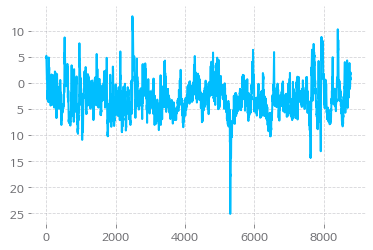

In [26]:
plt.plot(wu[:,2,2])  # [2 2] 72.5N 43.5W

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


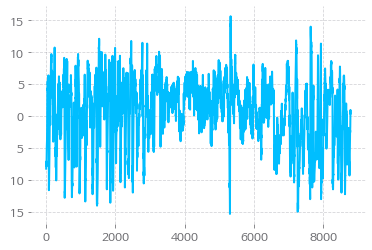

In [27]:
plt.plot(wv[:,2,2]) # [2 2] 72.5N 43.5W

In [18]:
# wind direction u,v to degree
# wd = np.arctan2(wu.data, wv.data)/np.pi*180+180

In [19]:
# metocean data save
# np.save('wu', wu.data)
# np.save('wv', wv.data)

# np.save('wd', wd)
# np.save('swh',swh.data)
# np.save('mwd',mwd.data)
# np.save('pwp', pwp.data)
# np.save('shww',shww.data)
# np.save('time_greg',time_greg.data)

In [20]:
# np.save('time_greg',time_greg)

In [21]:
time_greg[:5]

array([cftime.DatetimeGregorian(1979, 1, 1, 0, 0, 0, 0),
       cftime.DatetimeGregorian(1979, 1, 1, 1, 0, 0, 0),
       cftime.DatetimeGregorian(1979, 1, 1, 2, 0, 0, 0),
       cftime.DatetimeGregorian(1979, 1, 1, 3, 0, 0, 0),
       cftime.DatetimeGregorian(1979, 1, 1, 4, 0, 0, 0)], dtype=object)

In [22]:
# for tg in time_greg[:5]:
#     print(tg.year)
#     print(tg.month)
#     print(tg.day)
#     print(tg.hour)

## 시간 자료 형식 변경

In [28]:
time_year = []
time_month = []
time_day = []
time_hour = []

In [29]:
for tg in time_greg:
    time_year.append(tg.year)
    time_month.append(tg.month)
    time_day.append(tg.day)
    time_hour.append(tg.hour)

In [30]:
datetime_ECMWF = []

In [31]:
for tg in time_greg:
    datetime_ECMWF.append([tg.year, tg.month, tg.day, tg.hour])

In [32]:
len(time_year)

8784

In [28]:
import pickle

In [29]:
with open("datetime.pickle","wb") as fw:
    pickle.dump(datetime_ECMWF, fw)

## Data_time and Wind parameter 변경

In [34]:
#Date_time type 변경  (yyyy-mm-dd mm:ss)

Date_time = time_greg.astype('datetime64[s]')

In [35]:
Date_time

array(['1980-01-01T00:00:00', '1980-01-01T01:00:00',
       '1980-01-01T02:00:00', ..., '1980-12-31T21:00:00',
       '1980-12-31T22:00:00', '1980-12-31T23:00:00'],
      dtype='datetime64[s]')

In [32]:
# Wind parameter modified : wind speen and wind direction

ws = np.sqrt(wu.data**2+wv.data**2)                # wind speed (m/s)
wd = np.arctan2(wu.data, wv.data)/np.pi*180+180   # wind direction(deg)

## 원하는 위치의 Lon, Lat 로 데이터 추출

In [33]:
print(lon.shape)  # [2] = 43.5W
lon

(5,)


masked_array(data=[43.  , 43.25, 43.5 , 43.75, 44.  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [34]:
print(lat.shape)  # [2] = 72.5N
lat

(5,)


masked_array(data=[73.  , 72.75, 72.5 , 72.25, 72.  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [35]:
print(lon2.shape) # [1] 43.5W
lon2

(3,)


masked_array(data=[43. , 43.5, 44. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [36]:
print(lat2.shape)  # [1] 72.5N
lat2

(3,)


masked_array(data=[73. , 72.5, 72. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [37]:
# 원하는 위치 선정 wind data
lo = 2 # 43.5
la = 2  ## 72.5

In [38]:
# 원하는 위치 선정 wave data
low = 1 # 43.5
law = 1  ## 72.5

In [39]:
# data stack (datetime, wu, wv, ws,wd,swh,pwp, mwd, shww)
Metdata = np.stack((wu[:,lo,la],wv[:,lo,la],
                   ws[:,lo,la],wd[:,lo,la],swh[:,low,law],pwp[:,low,law],mwd[:,low,law],shww[:,low,law]),axis=1)

In [40]:
BS_data = pd.DataFrame(Metdata, columns = ['wu', 'wv', 'ws', 'wd', 'swh', 'pwp', 'mwd', 'shww'])

In [41]:
# dataname.insert(loc(0=맨앞), column name, value)
# metdata_pd['dataframe'] = datetime
BS_data.insert(0,'datetime',Date_time)

In [42]:
BS_data

,datetime,wu,wv,ws,wd,swh,pwp,mwd,shww
0,1979-01-01 00:00:00,-3.511307,-11.311249,11.843717,17.245697,3.548189,8.416359,16.447746,3.064941
1,1979-01-01 01:00:00,-2.022903,-11.037857,11.221695,10.385330,3.308470,8.380226,15.644556,2.729492
2,1979-01-01 02:00:00,-0.979095,-10.614609,10.659669,5.270081,3.069058,8.310402,14.453225,2.363037
3,1979-01-01 03:00:00,-0.411957,-10.006790,10.015266,2.357422,2.843885,8.197609,13.109766,2.067383
4,1979-01-01 04:00:00,0.261047,-9.433578,9.437189,358.414917,2.631712,8.024269,11.492941,1.726318
...,...,...,...,...,...,...,...,...,...
336931,2020-11-30 19:00:00,10.385666,9.870270,14.327744,226.457520,4.120685,8.623878,238.632980,3.545166
336932,2020-11-30 20:00:00,11.085052,10.613800,15.347023,226.244141,4.269912,8.758156,236.626144,3.769287
336933,2020-11-30 21:00:00,11.169662,10.499557,15.329778,226.771271,4.421461,9.111671,235.258179,3.947998
336934,2020-11-30 22:00:00,11.992355,10.996841,16.271051,227.479553,4.573709,9.279640,234.384445,4.159180


In [43]:
BS_data.shape

(336936, 9)

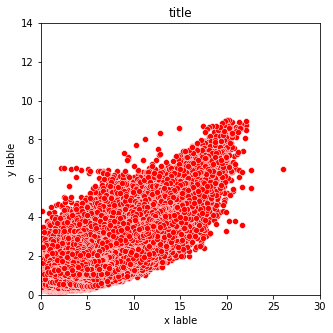

In [44]:
plt.figure(figsize = (5,5))
sns.scatterplot(x="ws", y="swh", data=BS_data, marker ='o', color ='red')
plt.title ("title")
plt.xlabel ("x lable")
plt.xlim([0, 30])
plt.ylabel ("y lable")
plt.ylim([0, 14])
# plt.legend()
plt.show()

## Data 저장

In [60]:
Outlier = BS_data[BS_data['swh']<0.001].index
BS_data_modified = BS_data.drop(Outlier)

In [65]:
BS_data.shape

(336936, 9)

In [64]:
BS_data_modified

(330312, 9)

In [66]:
# data csv로 저장하기

BS_data.to_csv('./Barents_72_5N_43_5W/NC_File/BS_data_ECMWF(1989_2020)_ori.csv')
BS_data_modified.to_csv('./Barents_72_5N_43_5W/NC_File/BS_data_ECMWF(1989_2020)_remove_outlier.csv')